In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [23]:

train = pd.read_csv('datasets/train.csv')

-----

In [24]:
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [25]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [26]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [27]:
def descriptive_to_numbers(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
    
    return numbered

def descriptive_to_numbers_no_po(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'NA':1})
    
    return numbered

In [28]:
def changes_to_dataframe(df):
    df['Basement + Liv Area'] = df['Total Bsmt SF'] + df['Gr Liv Area']
    df['Exter Qual'] = descriptive_to_numbers(df['Exter Qual'])
    df['Exter Cond'] = descriptive_to_numbers(df['Exter Cond'])
    df['Bsmt Cond'] = descriptive_to_numbers(df['Bsmt Cond'])
    df['Bsmt Qual'] = descriptive_to_numbers(df['Bsmt Qual'])
    df['Heating QC'] = descriptive_to_numbers(df['Heating QC'])
    df['Kitchen Qual'] = descriptive_to_numbers(df['Kitchen Qual'])
    df['Fireplace Qu'] = descriptive_to_numbers(df['Fireplace Qu'])
    df['Garage Qual'] = descriptive_to_numbers(df['Garage Qual'])
    df['Garage Cond'] = descriptive_to_numbers(df['Garage Cond'])
    df['Pool QC'] = descriptive_to_numbers_no_po(df['Pool QC'])
    df['Garage Area'] = df['Garage Area'].fillna(0)
    df['Garage Cars'] = df['Garage Cars'].fillna(0)
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    

In [29]:
changes_to_dataframe(train)

In [30]:
train = pd.concat([train,pd.get_dummies(train['Misc Feature'])], axis = 1)

In [31]:
train = pd.concat([train,pd.get_dummies(train['Neighborhood'])], axis = 1)

In [32]:
avg_price_per_neigh = train['SalePrice'].groupby(train['Neighborhood']).mean().sort_values()
avg_price_per_neigh

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

In [196]:
t = train[train['Neighborhood']=='StoneBr']

In [197]:
t['SalePrice'].describe()

count        38.000000
mean     329675.736842
std      128597.738212
min      130000.000000
25%      218125.000000
50%      322450.000000
75%      427085.000000
max      591587.000000
Name: SalePrice, dtype: float64

In [33]:
neigh_keys = avg_price_per_neigh.keys()
neigh_keys[0]

'MeadowV'

In [34]:
price_values = avg_price_per_neigh.values
price_values[0]

100231.25

In [35]:
avg_cost_per_neigh = {}
for x in range(0,28):
    avg_cost_per_neigh[neigh_keys[x]] = price_values[x]

In [36]:
avg_cost_per_neigh

{'MeadowV': 100231.25,
 'IDOTRR': 101103.1884057971,
 'BrDale': 103371.05263157895,
 'OldTown': 125276.30061349693,
 'BrkSide': 127022.69736842105,
 'Edwards': 130493.46853146853,
 'SWISU': 134758.875,
 'Landmrk': 137000.0,
 'Sawyer': 137181.9099099099,
 'NPkVill': 140476.4705882353,
 'Blueste': 144566.66666666666,
 'NAmes': 145905.81612903226,
 'Mitchel': 167656.70731707316,
 'SawyerW': 187760.16091954024,
 'Greens': 188666.66666666666,
 'Gilbert': 189228.3879310345,
 'NWAmes': 194619.02298850575,
 'Blmngtn': 200417.68181818182,
 'CollgCr': 202497.21666666667,
 'Crawfor': 205901.21126760563,
 'ClearCr': 217490.07407407407,
 'Somerst': 227183.9,
 'Timber': 241051.35416666666,
 'Veenker': 253570.58823529413,
 'GrnHill': 280000.0,
 'NoRidge': 316294.125,
 'NridgHt': 322831.3524590164,
 'StoneBr': 329675.7368421053}

In [37]:
train['NeighborhoodAvgCostPerHouse'] = train['Neighborhood']
train['NeighborhoodAvgCostPerHouse'] = train['NeighborhoodAvgCostPerHouse'].map(avg_cost_per_neigh)

In [38]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,NeighborhoodAvgCostPerHouse
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,0,0,137181.909910
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,187760.160920
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,145905.816129
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,1,0,241051.354167
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,187760.160920


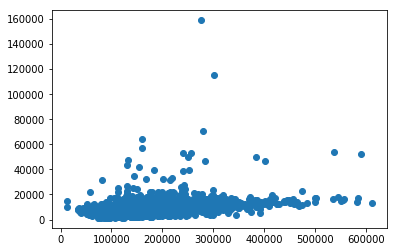

In [39]:
plt.scatter(train['SalePrice'],train['Lot Area'])

In [40]:
train['SalePrice'].sort_values().head()

1628    12789
183     13100
1309    34900
1292    35000
1518    35311
Name: SalePrice, dtype: int64

In [41]:
train['Lot Area'].sort_values().tail()

745      57200
960      63887
1854     70761
694     115149
471     159000
Name: Lot Area, dtype: int64

In [42]:
test[test['Lot Area']> 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
214,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,...,0,0,0,NaN,NaN,NaN,0,6,2009,WD
307,1571,916125425,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,...,0,0,0,NaN,NaN,Shed,700,8,2008,WD


In [43]:
train.loc[307,'Gr Liv Area']

1312

In [44]:
train['Basement + Liv Area'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [45]:
train['Gr Liv Area'].sort_values(ascending=False).head()

960     5642
1885    5095
616     3820
1897    3672
1035    3608
Name: Gr Liv Area, dtype: int64

In [46]:
train = train.drop(960)
train = train.drop(1885)
#train = train.drop(214)
#train = train.drop(307)

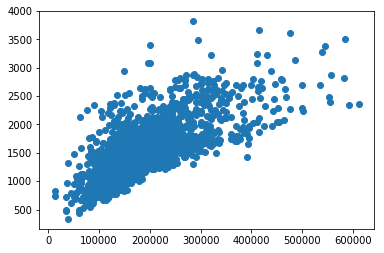

In [47]:
plt.scatter(train['SalePrice'],train['Gr Liv Area'])

In [88]:
train[['Garage Yr Blt','Year Built','Garage Type']].head()

,Garage Yr Blt,Year Built,Garage Type
0,1976.0,1976,Attchd
1,1997.0,1996,Attchd
2,1953.0,1953,Detchd
3,2007.0,2006,BuiltIn
4,1957.0,1900,Detchd


In [93]:
train['Year Built'].count()

2049

In [91]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Year Built'])

In [95]:
train[['Mas Vnr Type', 'Mas Vnr Area']].head()

,Mas Vnr Type,Mas Vnr Area
0,BrkFace,289.0
1,BrkFace,132.0
2,None,0.0
3,None,0.0
4,None,0.0


In [112]:
a = train[train['BsmtFin SF 1'].isnull()]

In [116]:
a['Bsmt Cond']

1327    0
Name: Bsmt Cond, dtype: int64

In [117]:
lots = train[['Lot Frontage', 'Lot Area']]

In [125]:
lots.describe()

,Lot Frontage,Lot Area
count,1719.000000,2049.000000
mean,68.878999,10024.677892
std,22.472112,6608.511749
min,21.000000,1300.000000
25%,58.000000,7500.000000
50%,68.000000,9405.000000
75%,80.000000,11500.000000
max,313.000000,159000.000000


In [126]:
train[['Lot Frontage','Lot Area']];

In [128]:
train['Lot Frontage'].mean()

68.87899941826643

In [137]:
b = train[train['Bsmt Unf SF'].isnull()]

In [138]:
b['Bsmt Qual']

1327    0
Name: Bsmt Qual, dtype: int64

In [141]:
train[['BsmtFin Type 1', 'BsmtFin Type 2']];

In [ ]:
train['Multiple Basement Score'] = train['BsmtFin Type 1']+train['BsmtFin Type 2']

In [143]:
train['Total Number Of Baths Scaled'] = train['Bsmt Full Bath'] + train['Bsmt Half Bath']*.5 + train['Full Bath'] + train['Half Bath']*.5

In [147]:
bathcount = train[['Total Number Of Baths Scaled', 'Bsmt Full Bath', "Bsmt Half Bath", 'Full Bath','Half Bath']]

In [152]:
bathcount[bathcount['Total Number Of Baths Scaled'].isnull()]

,Total Number Of Baths Scaled,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath
616,NaN,NaN,NaN,3,1
1327,NaN,NaN,NaN,1,0


In [145]:
train['Total Number Of Baths Unscaled'] = train['Bsmt Full Bath'] + train['Bsmt Half Bath'] + train['Full Bath'] + train['Half Bath']

In [153]:
emptybsmtbath = train[['Bsmt Full Bath', 'Bsmt Qual']]

In [167]:
train.columns.tolist()

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

In [ ]:
for x in train[['Bedroom AbvGr','BsmtFin Type 1','BsmtFin Type 2']]

In [170]:
train[['Bedroom AbvGr','BsmtFin Type 1','BsmtFin Type 2']].head()

,Bedroom AbvGr,BsmtFin Type 1,BsmtFin Type 2
0,3,GLQ,Unf
1,4,GLQ,Unf
2,3,GLQ,Unf
3,3,Unf,Unf
4,3,Unf,Unf


In [176]:
train['Functional'].value_counts()

Typ     1913
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [175]:
train['TotRms AbvGrd']

0        6
1        8
2        5
3        7
4        6
5        6
6        5
7        6
8        6
9        9
10       4
11       6
12       7
13       7
14       6
15       7
16       7
17       5
18       7
19       7
20       5
21       5
22       8
23       6
24       5
25       6
26       5
27       7
28       9
29       6
        ..
2021     6
2022     7
2023     6
2024     6
2025    10
2026     8
2027     8
2028     9
2029     7
2030     7
2031     6
2032     6
2033     5
2034     6
2035     5
2036     8
2037     5
2038     5
2039     5
2040     7
2041    10
2042     8
2043     6
2044     6
2045     7
2046     7
2047     4
2048     9
2049     6
2050     7
Name: TotRms AbvGrd, Length: 2049, dtype: int64

In [181]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,NeighborhoodAvgCostPerHouse,Total Number Of Baths Scaled,Total Number Of Baths Unscaled
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,1,0,0,0,0,0,137181.909910,2.5,3.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,187760.160920,3.5,4.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,145905.816129,2.0,2.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,1,0,241051.354167,2.5,3.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,187760.160920,2.0,2.0


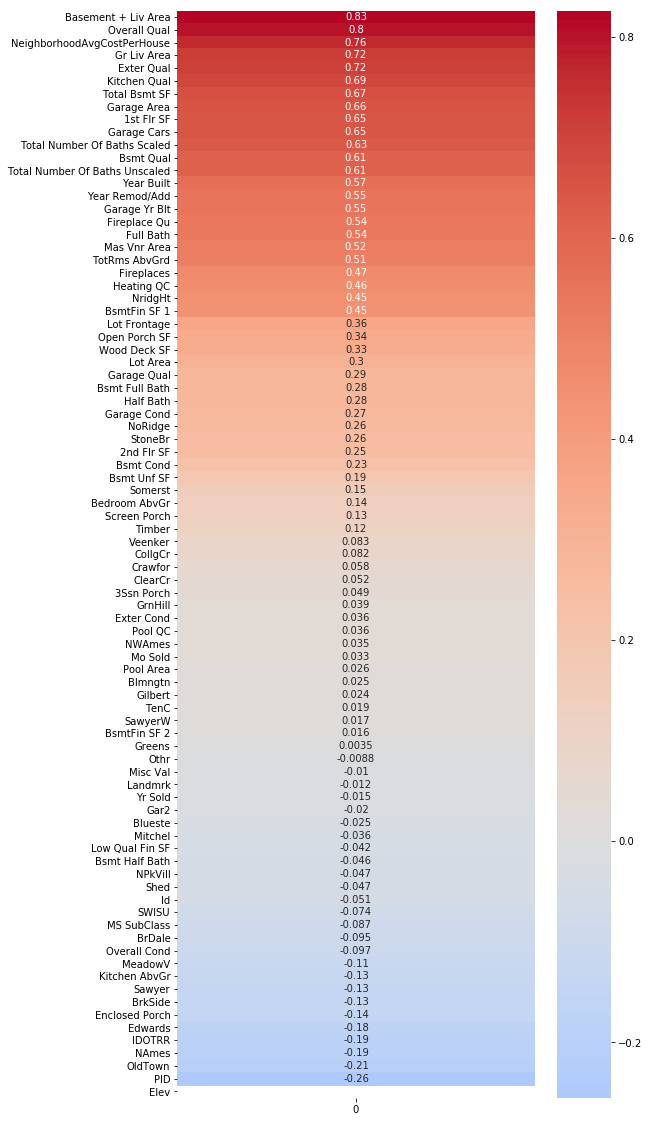

In [146]:
train_corr = train.corrwith(train['SalePrice']).sort_values(ascending=False)[1:]
train.corrwith(train['SalePrice']).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,20))
sns.heatmap(train_corr.to_frame(), center=0, cmap='coolwarm', annot=True)

In [49]:
train[list(train_corr.index[0:30])].isnull().sum()

Basement + Liv Area              0
Overall Qual                     0
NeighborhoodAvgCostPerHouse      0
Gr Liv Area                      0
Exter Qual                       0
Kitchen Qual                     0
Total Bsmt SF                    0
Garage Area                      0
1st Flr SF                       0
Garage Cars                      0
Bsmt Qual                        0
Year Built                       0
Year Remod/Add                   0
Fireplace Qu                     0
Full Bath                        0
Garage Yr Blt                  114
Mas Vnr Area                    22
TotRms AbvGrd                    0
Fireplaces                       0
Heating QC                       0
NridgHt                          0
BsmtFin SF 1                     1
Lot Frontage                   330
Open Porch SF                    0
Wood Deck SF                     0
Lot Area                         0
Garage Qual                      0
Bsmt Full Bath                   2
Half Bath           

In [50]:
features = list(train_corr.index[0:15])
X = train[features]
y = train['SalePrice']

## Model Prep: Train/test split

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Model Prep: Scaling

Since we're using `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fit a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.

In [52]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Model Prep: Instantiate our models

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [53]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

In [54]:
ridge = RidgeCV()
ridge.fit(X_train_sc, y_train)
r_alpha = ridge.alpha_
r_alpha

10.0

In [55]:
lasso = LassoCV()
lasso.fit(X_train_sc, y_train)
l_alpha = lasso.alpha_
l_alpha

66.26207559444161

In [56]:
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=3).mean()
lasso_scores = cross_val_score(Lasso(alpha=l_alpha), X_train_sc, y_train, cv=3).mean()
ridge_scores = cross_val_score(Ridge(alpha=r_alpha), X_train_sc, y_train, cv=3).mean()

print(f'Linear Regresion CV Score: {lr_scores}')
print(f'Lasso CV Score: {lasso_scores}')
print(f'Ridge CV Score: {ridge_scores}')

Linear Regresion CV Score: 0.8580076793300603
Lasso CV Score: 0.8579680597802773
Ridge CV Score: 0.8581014538900561


In [57]:
lr.fit(X_train_sc, y_train)
lasso.fit(X_train_sc, y_train)
ridge.fit(X_train_sc, y_train)

lr_predict = lr.predict(X_test_sc)
lasso_predict = lasso.predict(X_test_sc)
ridge_predict = ridge.predict(X_test_sc)

lr_r2 = r2_score(y_test, lr_predict)
lasso_r2 = r2_score(y_test, lasso_predict)
ridge_r2 = r2_score(y_test, ridge_predict)

print(f'Linear Regresion R2: {lr_r2}')
print(f'Lasso R2 Score: {lasso_r2}')
print(f'Ridge R2 Score: {ridge_r2}')

Linear Regresion R2: 0.8649871053602735
Lasso R2 Score: 0.8649795159404526
Ridge R2 Score: 0.8650699292232482


In [58]:
lrscoretrain = lr.score(X_train_sc,y_train)
lrscoretest = lr.score(X_test_sc, y_test)
lassoscoretrain = lasso.score(X_train_sc,y_train)
lassoscoretest = lasso.score(X_test_sc, y_test)
ridgescoretrain = ridge.score(X_train_sc,y_train)
ridgescoretest = ridge.score(X_test_sc, y_test)

print(f'Linear Regresion Score on Train: {lrscoretrain}')
print(f'Linear Regresion Score on Test: {lrscoretest}')
print('')
print(f'Lasso Score on Train: {lassoscoretrain}')
print(f'Lasso Score on Test: {lassoscoretest}')
print('')
print(f'Ridge Score on Train: {ridgescoretrain}')
print(f'Ridge Score on Test: {ridgescoretest}')

Linear Regresion Score on Train: 0.861449449007291
Linear Regresion Score on Test: 0.8649871053602735

Lasso Score on Train: 0.8614281669697815
Lasso Score on Test: 0.8649795159404526

Ridge Score on Train: 0.8614362997234204
Ridge Score on Test: 0.8650699292232481


## Reset X and y
----

In [59]:
X, y

(      Basement + Liv Area  Overall Qual  NeighborhoodAvgCostPerHouse  \
 0                  2204.0             6                137181.909910   
 1                  3035.0             7                187760.160920   
 2                  2114.0             5                145905.816129   
 3                  1828.0             5                241051.354167   
 4                  2121.0             6                187760.160920   
 5                  3405.0             6                145905.816129   
 6                  1619.0             6                130493.468531   
 7                  2376.0             5                145905.816129   
 8                  1848.0             5                125276.300613   
 9                  3120.0             5                145905.816129   
 10                 1470.0             6                103371.052632   
 11                 2416.0             7                202497.216667   
 12                 2016.0             5           

In [60]:


X_sc = ss.transform(X)

In [61]:
X_sc

array([[-0.4599721 , -0.07027352, -0.72663251, ...,  1.00704469,
        -0.97411452,  0.76992763],
       [ 0.62203954,  0.63063644,  0.10988732, ...,  0.62695546,
         0.68775875,  0.76992763],
       [-0.57715747, -0.77118348, -0.58234677, ...,  1.102067  ,
        -0.97411452, -1.02190395],
       ...,
       [ 0.32777404, -0.07027352,  0.40992435, ..., -1.60606878,
         0.68775875, -1.02190395],
       [-0.20476839, -1.47209344, -0.58234677, ..., -1.32100186,
         1.24171651, -1.02190395],
       [ 0.31345138,  0.63063644,  0.1341705 , ...,  0.72197776,
         0.68775875,  0.76992763]])

In [62]:
ridge = RidgeCV()
ridge_model = ridge.fit(X_sc, y)

In [63]:
l_alphas = np.arange(0.15,1,0.01)
lasso_model = LassoCV(alphas=l_alphas)
lasso_model = lasso.fit(X_sc, y)


In [64]:
best_alpha = lasso_model.alpha_
best_alpha

65.36378301649589

In [65]:
lasso_model.score(X_sc,y)

0.8625547147642726

In [66]:
ridge_model.score(X_sc,y)

0.8625689357901694

## Submitting Our Model

----

In [67]:
test = pd.read_csv('datasets/test.csv')

In [68]:
changes_to_dataframe(test)

In [69]:
test['NeighborhoodAvgCostPerHouse'] = test['Neighborhood']
test['NeighborhoodAvgCostPerHouse'] = test['NeighborhoodAvgCostPerHouse'].map(avg_cost_per_neigh)

In [70]:
X_test = test[features]

In [71]:
X_test_sc = ss.transform(X_test)

In [72]:
X_test_sc

array([[ 0.50876034, -0.07027352, -0.92354083, ..., -1.60606878,
        -0.97411452,  0.76992763],
       [ 1.79259123, -0.77118348, -0.72663251, ..., -0.32326762,
        -0.97411452,  0.76992763],
       [-0.53028332,  0.63063644,  0.1341705 , ...,  1.05455584,
         1.24171651,  0.76992763],
       ...,
       [-0.51335654, -0.77118348, -0.72663251, ..., -0.75086801,
         0.68775875, -1.02190395],
       [-1.07975253, -1.47209344, -0.58234677, ..., -0.60833455,
        -0.97411452, -1.02190395],
       [-0.92350536, -0.77118348, -0.58234677, ..., -1.36851301,
         0.68775875, -1.02190395]])

In [73]:
predictions = ridge_model.predict(X_test_sc)

In [74]:
predictions

array([140113.9937883 , 205205.24858556, 192758.64068297, 126195.40721707,
       180236.13549465,  83125.74288054, 110020.69717696, 168403.57843603,
       213402.41567373, 154246.06636893, 179452.78562563, 115337.7411951 ,
       167064.07359593, 243911.97472515, 168131.96100273, 115485.81398087,
       155042.83803462, 117984.93449019, 186521.76191458, 204872.27665698,
       142293.26507208, 116381.49220796, 223918.49336392, 154424.50030879,
       206934.9165663 , 119012.75831666, 147892.91595949, 155016.43587596,
       141782.72869788,  26489.30403753, 112513.77167328, 100956.53490381,
       270550.10924699, 170410.00650575, 233344.23808095, 167081.00023023,
       129339.65818642,  58731.41216784, 116365.45698163, 218130.48032072,
       170429.870484  , 219452.21101754, 165964.94944678, 163063.8223084 ,
       235008.25870495, 103957.00582122, 225573.08247713, 117749.12504384,
       113634.9455757 , 116477.89754025, 107820.06973639, 199092.91680657,
       265963.73283917, 1

In [75]:
test['SalePrice'] = predictions

In [76]:
submission = test[['Id','SalePrice']]

In [77]:
submission.head()

,Id,SalePrice
0,2658,140113.993788
1,2718,205205.248586
2,2414,192758.640683
3,1989,126195.407217
4,625,180236.135495


In [78]:
#submission.to_csv('javier_ames_12_04_4.csv', index=False)